<a href="https://colab.research.google.com/github/rvaidya2-ksu/IT7103/blob/main/IT_7103_Assignment_2_rvaidya2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   IT 7103
*   Assignment 2
*   Rajshree Vaidya




**1.Load the data into a Python session as a Pandas DataFrame. Check if all columns are in correct type, and fix any incorrect ones if necessary**

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/A2/auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [36]:
data.shape

(398, 9)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [38]:
data['origin'] = data['origin'].apply(str)    # Since number codes represent Asia, Europe, and North America, therefore setting it as a categorical variable.

print(data.dtypes)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin           object
car name         object
dtype: object


2.	**Split the data 75% training and 25% testing**

In [39]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(data, test_size=0.25) #test_size=0.25 means that 25% of data will be for testing, 75% for training
traindata.shape, testdata.shape

((298, 9), (100, 9))

In [40]:
traindata.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,298.000000,298.000000,298.000000,292.000000,298.000000,298.000000,298.000000
mean,23.720470,5.456376,195.414430,105.006849,2973.161074,15.534899,76.093960
std,7.920379,1.713418,106.224019,39.958655,847.676683,2.912574,3.809155
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.125000,4.000000,105.000000,75.750000,2226.500000,13.625000,73.000000
50%,23.100000,4.000000,151.000000,92.000000,2795.000000,15.500000,76.000000
75%,29.800000,8.000000,265.750000,130.000000,3608.000000,17.275000,79.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000


3.	 **Visualize necessary columns in the data. After this point, you should have three lists:
•	Columns that are numeric and have symmetric distributions
•	Columns that are numeric and have skewed distributions
•	Columns that are categorical**


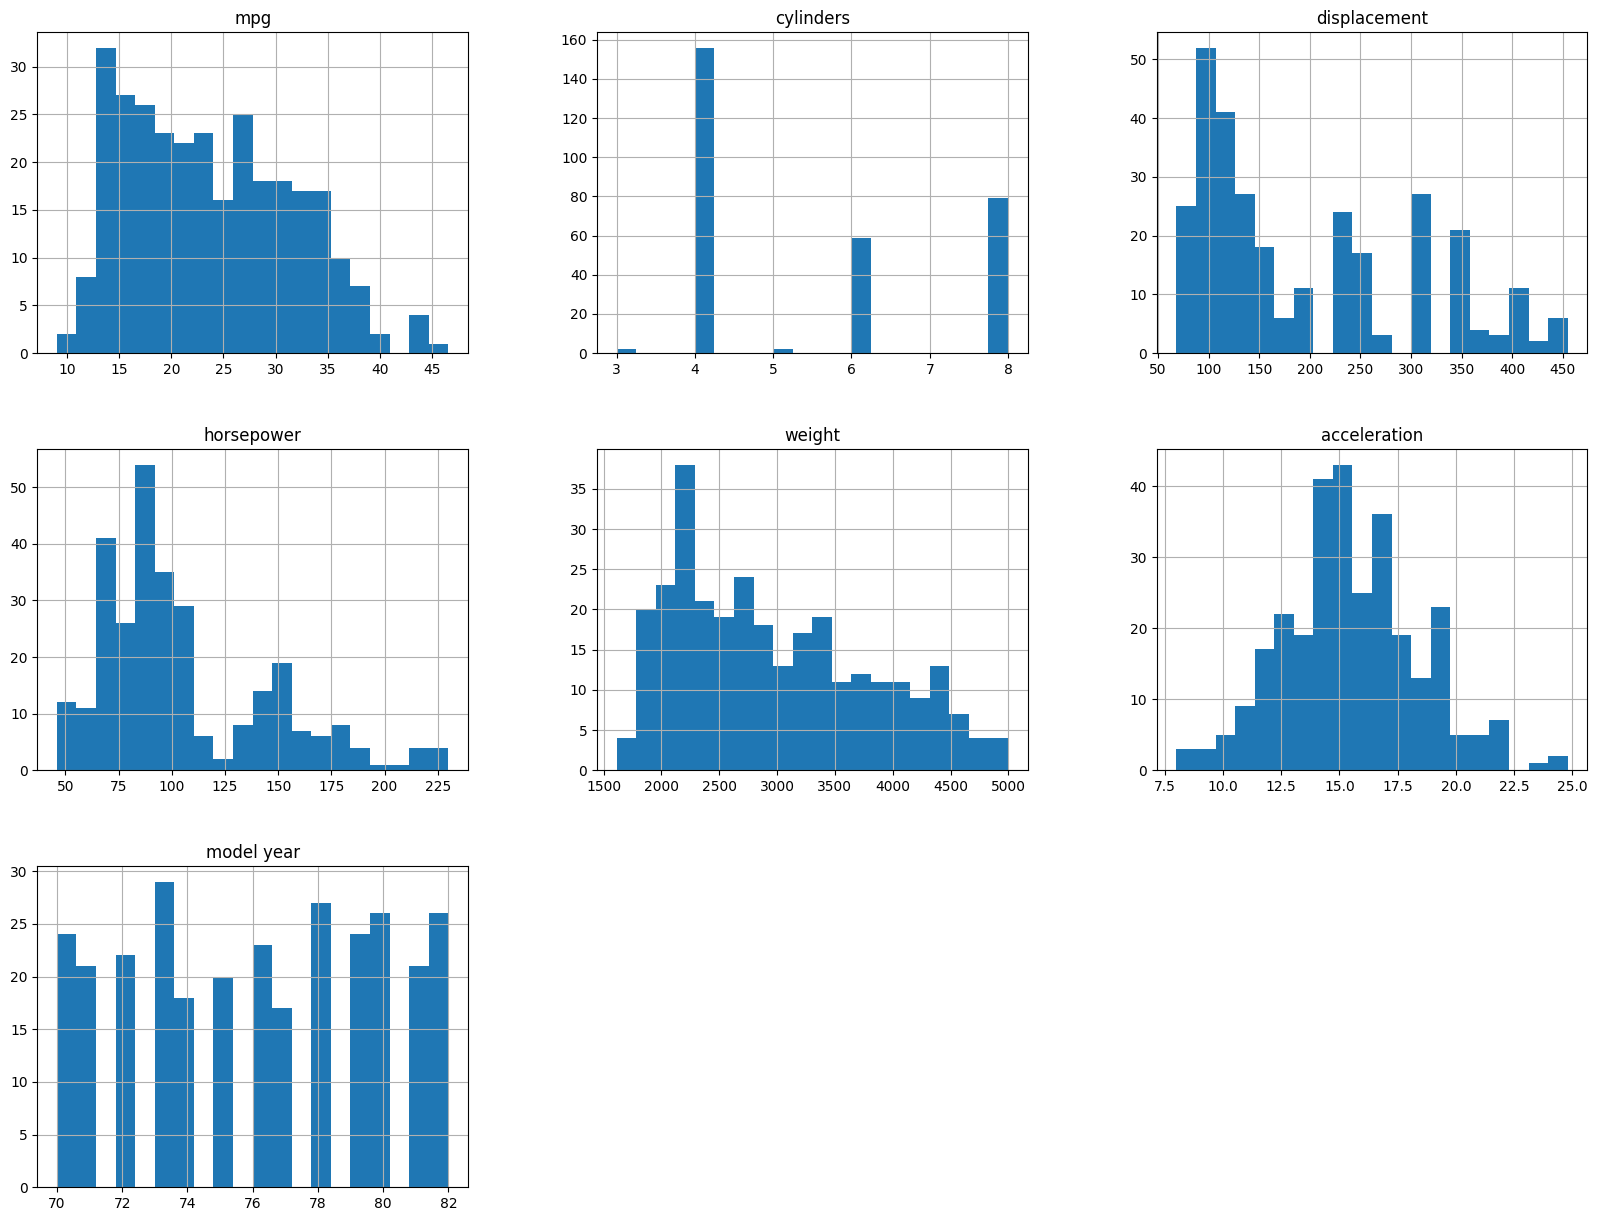

In [41]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

**Numeric column**

In [42]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]

num_cols

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year']

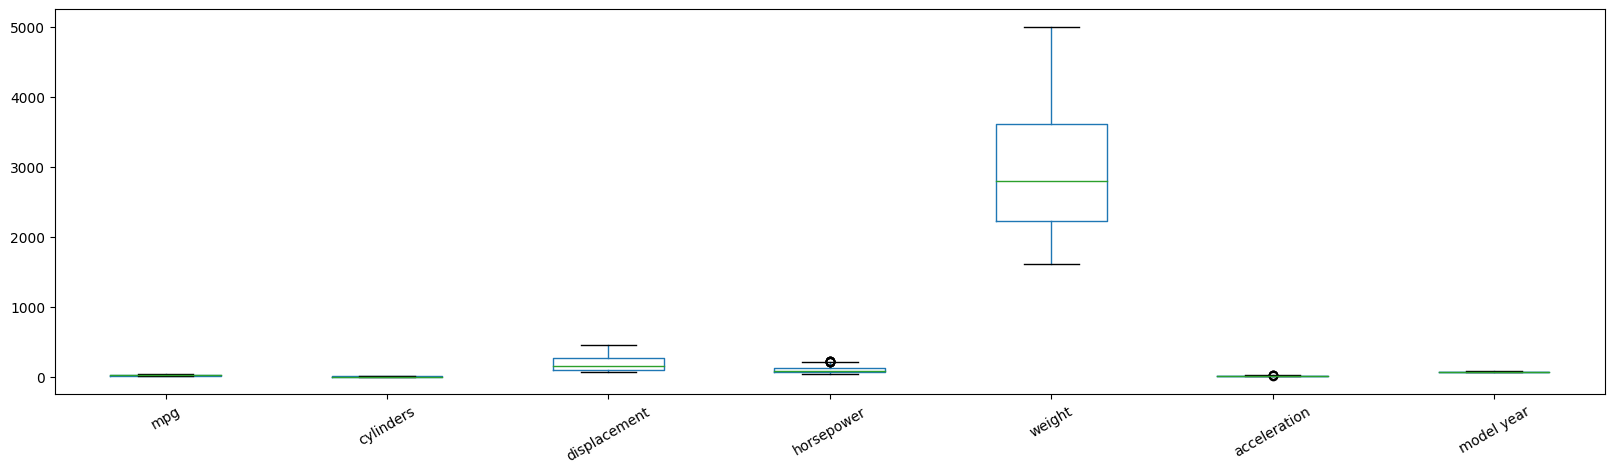

In [43]:
traindata[num_cols].boxplot(grid=False, figsize=(20,5), rot=30)
plt.show()

**Categorical column**

In [44]:
cat_cols = [column for column in traindata.columns if traindata[column].dtypes == object]
cat_cols

['origin', 'car name']

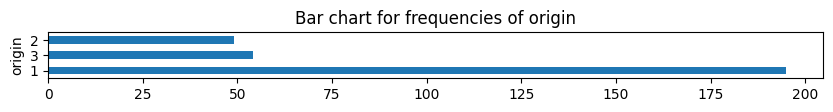

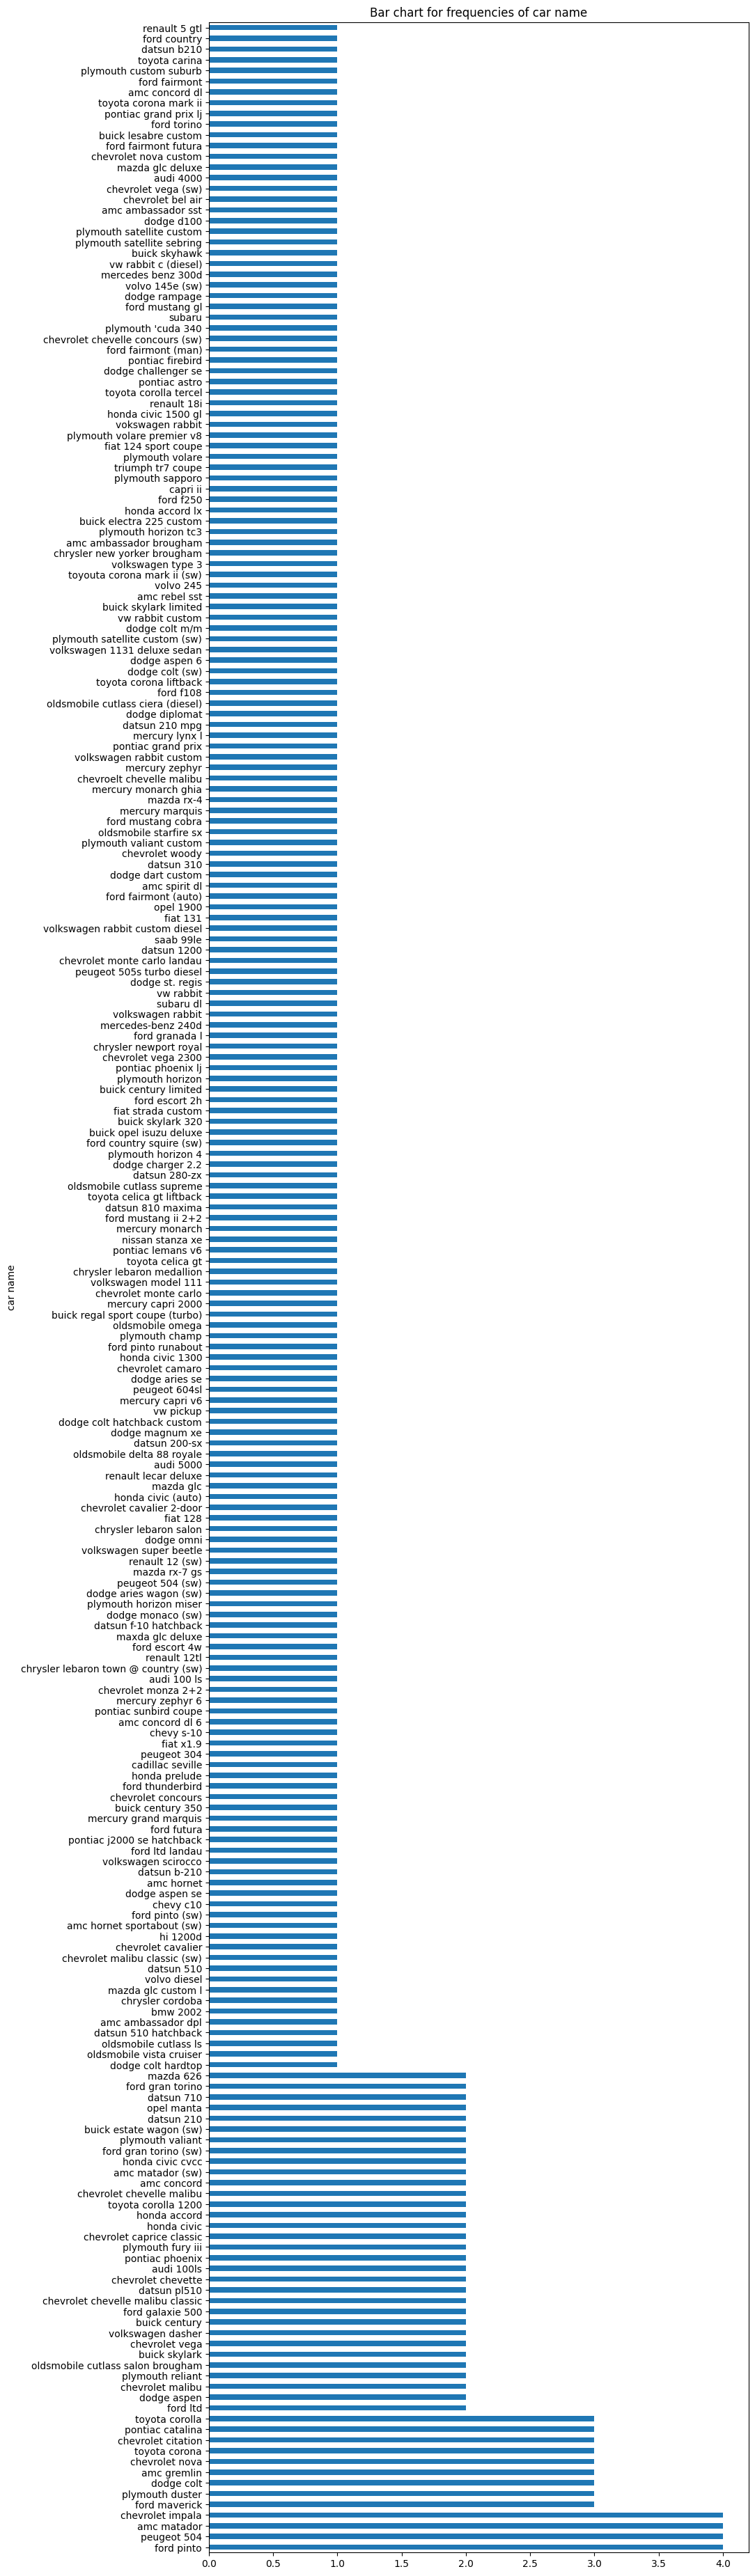

In [45]:
for col in cat_cols:
    freq_table = traindata[col].value_counts()
    plt.figure(figsize = (10,len(freq_table)*0.2)) #a bit formatting so that chart look better
    freq_table.plot.barh(title='Bar chart for frequencies of ' + col)
    plt.show()
    print()

**Note: Adding acceleration in log_cols so as to make it more normalized. **

In [46]:
num_cols = ['cylinders', 'model year']                                #this list is for symmetric numeric columns
log_cols = ['displacement', 'horsepower', 'weight', 'acceleration']   #this list is for skewed numeric columns
cat_cols = ['origin', 'car name']                                     #this list for the class columns
target = 'mpg'

4. Build a pipeline as follows:
•	Numeric and symmetric columns: 	Imputation  Standardization
•	Numeric and skewed columns:		Imputation  Log transformation  Standardization
•	Categorical columns: 			One hot encoder


In [47]:
#processing pipeline
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np

num_pipeline = Pipeline([                           #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),   #this step will impute missing values using column medians
    ('standardize', StandardScaler())               #this step will scale all numeric columns
])

def log_transformation(x):
    return np.log(x+0.1)

log_pipeline = Pipeline([                                        #now we need a small pipeline for numeric columns since it has two steps
    ('impute', SimpleImputer(strategy='median')),                #this step will impute missing values using column medians
    ('log transform', FunctionTransformer(log_transformation)), #this include a log transformation into the pipeline
    ('standardize', StandardScaler())                            #this step will scale all numeric columns
])

processing_pipeline = ColumnTransformer([                                                      #this transformer merges the processed numeric columns and class columns
    ('numeric', num_pipeline, num_cols),                                                       #numeric columns
    ('log', log_pipeline, log_cols),                                                           #log columns
    ('class', OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist'), cat_cols) #encoder to transform class columns to numeric, this will automatically handle missing data
  ])

In [48]:
processing_pipeline

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['cylinders', 'model year']),
                                ('log',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transformation at 0x7fbc5cc5c0d0>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['displacement', 'horsepower', 'weight',
                                  'acceleration']),
                                ('class',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               max_categories=5),
                                 ['origin', 'car name'])])

**5. Train the pipeline on the training data. Then perform transformation on the training data and testing data**

**First, Training the Random forest model pipeline and testing**

In [49]:
from sklearn.ensemble import RandomForestRegressor

forest_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',RandomForestRegressor())
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['cylinders', 'model year']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fbc5cc5c0d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['origin', 'car name'])])),
                ('modeling', RandomForestRegressor())])

**Since this is a regression problem, I am using MAE and MSE for performance testing**.

In [50]:
from sklearn import metrics
forest_pred = forest_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], forest_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], forest_pred))



MAE = 0.7194731543624165
MSE = 1.1200531174496657


In [51]:
forest_pred_test = forest_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], forest_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], forest_pred_test))

MAE = 1.9932100000000004
MSE = 8.113549209999997


The difference between the training set error and test set error is huge. Looks like the model is over fitting.

**Tuning random forest model**

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200],
    'n_estimators': [5, 10, 20, 50]
}]

forest = RandomForestRegressor()

grid_search = GridSearchCV(forest, param_grid, cv=5, return_train_score=True)

forest_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling forest', grid_search)
])

forest_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['cylinders', 'model year']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fbc5cc5c0d0>)...
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['origin', 'car name'])])),
                ('modeling forest',
                 GridSearchCV(cv=5, estimator=RandomForestRegressor(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200],
                                           'n_estimators': [5, 10, 20, 50]}],
                              return_train_score=True))])

In [53]:
forest_pred = forest_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], forest_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], forest_pred))

MAE = 2.368419290534974
MSE = 10.60985686082941


In [54]:
forest_pred_test = forest_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], forest_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], forest_pred_test))

MAE = 2.6621082160215463
MSE = 12.518529150967993


After using Gridsearch, the difference between training set error and test set
error is comparetively lesser. Looks like the model has been trained well enough without over fitting.

**Now, training Decision tree model pipeline and testing**

In [55]:
from sklearn.tree import DecisionTreeRegressor

tree_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('modeling',DecisionTreeRegressor())
])

tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['cylinders', 'model year']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fbc5cc5c0d0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['displacement', 'horsepower',
                                                   'weight', 'acceleration']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['origin', 'car name'])])),
                ('modeling', DecisionTreeRegressor())])

**Since this is a regression problem, I am using MAE and MSE for performance testing.**

In [56]:
# Performance on training set
from sklearn import metrics
tree_pred = tree_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], tree_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], tree_pred))


MAE = 0.0
MSE = 0.0


In [57]:
# Performance on test set
tree_pred_test = tree_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], tree_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], tree_pred_test))

MAE = 2.468
MSE = 11.8398


The difference between the training set error and test set error is huge. Looks like the model is over fitting.

**Tuning Decision tree model**

In [58]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'max_depth': [2, 3, 4, 5],
    'max_features' : [5, 10, 15, 20],
    'min_samples_split' : [25, 50, 100, 200],
    'min_samples_leaf' : [25, 50, 100, 200]
}]

tree = DecisionTreeRegressor()

grid_search = GridSearchCV(tree, param_grid, cv=5, return_train_score=True)

tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('modeling forest', grid_search)
])

tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['cylinders', 'model year']),
                                                 ('log',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transformation at 0x7fbc5cc5c0d0>)...
                                                   'weight', 'acceleration']),
                                                 ('class',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                max_categories=5),
                                                  ['origin', 'car name'])])),
                ('modeling forest',
                 GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                              param_grid=[{'max_depth': [2, 3, 4, 5],
                                           'max_features': [5, 10, 15, 20],
                                           'min_samples_leaf': [25, 50, 100,
                                                                200],
                                           'min_samples_split': [25, 50, 100,
                                                                 200]}],
                              return_train_score=True))])

In [59]:
# Performance on training set
tree_pred = tree_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], tree_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], tree_pred))

MAE = 2.3065622903832548
MSE = 9.349900148350525


In [60]:
# Performance on test set
tree_pred_test = tree_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], tree_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], tree_pred_test))

MAE = 2.5672519330220704
MSE = 11.910940389990028


After using Gridsearch, the difference between training set error and test set
error is comparetively lesser. Looks like the model has been trained well enough without over fitting.

**6.	Print the shape of the processed training data and processed testing data.**

In [61]:
traindata.shape

(298, 9)

In [62]:
testdata.shape

(100, 9)

Both the Random forest and Decision tree model, after being trained using Gridsearch have similar test set error. While comparing both models, Decision tree model has slightly better test set error.